## Question 2

In [57]:
def find_pairs(lst, k):
    if len(lst) < 2:
        return []
    else:
        head = lst[0]
        tail = lst[1:]
        pairs = []
        for num in tail:
            if head + num == k:
                pairs.append((head, num))
        pairs += find_pairs(tail, k)
        # print(pairs)
        return list(set(pairs))


In [58]:
lst = []

n = int(input("Enter number of elements : "))
print("Enter elements : ")
  
for i in range(0, n):
    ele = int(input())
    lst.append(ele)
      
k = int(input("Enter value of K : "))
print(lst)
result = find_pairs(lst, k)
print(result)

Enter elements : 
[3, 4, 2, 3, 4]
[(3, 4), (4, 3)]


## Question 3

In [66]:
import sys
def find_pairs(lst, k, max_memory):
    mem_usage = 0
    if len(lst) < 2:
        return []
    else:
        head = lst[0]
        tail = lst[1:]
        pairs = []
        for num in tail:
            if head + num == k:
                pairs.append((head, num))
        mem_usage += sys.getsizeof(pairs)
        
        pairs += find_pairs(tail, k, max_memory)
        print(mem_usage)
        if(mem_usage > max_memory):
            raise MemoryError
        # print(pairs)
        return list(set(pairs))

In [65]:
lst = []

n = int(input("Enter number of elements : "))
print("Enter elements : ")
  
for i in range(0, n):
    ele = int(input())
    lst.append(ele)
      
k = int(input("Enter value of K : "))
max_memory = int(input("Enter max memory : "))
print(lst)

try:
    result = list(find_pairs(lst, k, max_memory))
    print(result)
except MemoryError:
    print("Memory limit exceeded!")

Enter elements : 
[3, 5, 3, 6, 3]
56
[]
56
[]
88
[(5, 3), (5, 3)]
88
[(3, 5), (5, 3)]
[(5, 3), (3, 5)]


## Question 4a

In [73]:
def filter_by_age(people, age):
    res = {}
    for name, person_age in people.items():
        if person_age >= age:
            res[name] = person_age 
    return res

In [77]:
people = {"Alice": 25, "Bob": 30, "Charlie": 18, "David": 20, "Eve": 19}
age = 30

results = filter_by_age(people, age)

print(results)

{'Bob': 30}


In [78]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def is_adult(self):
        return self.age >= 18

## Question 4d

In [216]:
def log_decorator(function):
    def wrapper(*args):
        with open(r"C:\Users\Steve D James\Desktop\log.txt", "a") as f:
            f.write("Function name: {}\n".format(function.__name__))
            f.write("Input arguments: args={}\n".format(args))
        return function(*args)
    return wrapper

## Question 4e

In [217]:
@log_decorator
def filter_by_age(people, age):
    result = {}
    for name, person_age in people.items():
        if person_age >= age:
            result[name] = person_age
    return result


people = {'Alice': 25, 'Bob': 30, 'Charlie': 18, 'David': 20, 'Eve': 19}
age = int(input('Enter the age for filtering: '))
print(filter_by_age(people, age))

{'Alice': 25, 'Bob': 30}


## Question 4f

In [219]:

name_to_upper = lambda person: person.name.upper()
name_to_upper

<function __main__.<lambda>(person)>

## Question 4g

In [220]:

def upper_case_names(persons):
    return list(map(name_to_upper, persons))
persons = [Person('Alice', 25), Person('Bob', 30), Person('Charlie', 18), Person('David', 20), Person('Eve', 19)]
print(persons)
print(upper_case_names(persons))


[<__main__.Person object at 0x000001F21C02E1D0>, <__main__.Person object at 0x000001F21A048B50>, <__main__.Person object at 0x000001F21C02D0D0>, <__main__.Person object at 0x000001F21C02F150>, <__main__.Person object at 0x000001F21C02D490>]
['ALICE', 'BOB', 'CHARLIE', 'DAVID', 'EVE']


## Question 4h

In [221]:
def main():
    persons = {'Alice': 25, 'Bob': 30, 'Charlie': 18, 'David': 20, 'Eve': 19}

    print(persons)
    
    print(filter_by_age(persons, 25))
    persons_list = [Person(name, age) for name, age in persons.items()]
    print(persons_list)
    print(upper_case_names(persons_list))

if __name__ == '__main__':
    main()

{'Alice': 25, 'Bob': 30, 'Charlie': 18, 'David': 20, 'Eve': 19}
{'Alice': 25, 'Bob': 30}
[<__main__.Person object at 0x000001F219D5D190>, <__main__.Person object at 0x000001F21A76C510>, <__main__.Person object at 0x000001F21BF87610>, <__main__.Person object at 0x000001F219CAE810>, <__main__.Person object at 0x000001F219CAC1D0>]
['ALICE', 'BOB', 'CHARLIE', 'DAVID', 'EVE']


## Question 1

In [388]:
import requests
import datetime
import pandas as pd
import pyodbc

# API endpoint and parameters
url = "http://api.openweathermap.org/data/2.5/forecast"
api_key = "cfe6086b0faba19cb2acd1a2e5b56149"
cities = ["New York", "London", "Paris", "Tokyo"]
# start_date = datetime.datetime(2023, 2, 1)
# end_date = datetime.datetime(2023, 2, 6)

temperature_data = []
for city in cities:
    for i in range(40):
        try:
            query_params = {"q": city, "appid": api_key, "units": "metric" }
            response = requests.get(url, params=query_params)
            temperature = response.json()['list'][i]["main"]["temp"]
            dt = response.json()['list'][i]["dt_txt"]
            temperature_data.append({"city": city, "date": dt, "temperature": temperature})
        except requests.exceptions.HTTPError as e:
            print(f'Error retrieving data for {city}: {e}')
        except e:
            print("Unknown error occured!!")

df = pd.DataFrame(temperature_data)
df



,city,date,temperature
0,New York,2023-02-23 09:00:00,3.83
1,New York,2023-02-23 12:00:00,4.36
2,New York,2023-02-23 15:00:00,4.87
3,New York,2023-02-23 18:00:00,6.72
4,New York,2023-02-23 21:00:00,6.45
...,...,...,...
155,Tokyo,2023-02-27 18:00:00,8.44
156,Tokyo,2023-02-27 21:00:00,7.64
157,Tokyo,2023-02-28 00:00:00,9.64
158,Tokyo,2023-02-28 03:00:00,15.16


In [386]:
import pyodbc
try:
    
    conn = pyodbc.connect('Driver={SQL Server};'
                        'Server=DESKTOP-1THVIIQ\MSSQLSERVER02;'
                        'Database=python_assesment1;'
                        'Trusted_Connection=yes;')

    cursor = conn.cursor()
    
    # for row in df.itertuples():
    #     cursor.execute(f"INSERT INTO temperature_data (City, Date, Temperature) VALUES (?, ?, ?)", row.city, row.date, row.temperature)
    # conn.commit()

    result = []
    cursor.execute("SELECT * FROM temperature_data")
    for i in cursor:
        # print(i[1])
        result.append({"city": i[1], "date": i[2], "temperature": i[3]})

    dframe = pd.DataFrame(result)
    print(dframe)
except pyodbc.Error as e:
    print(f'Error connecting to SQL Server: {e}')


    
    


         city                date  temperature
0    New York 2023-02-23 06:00:00         3.98
1    New York 2023-02-23 09:00:00         4.58
2    New York 2023-02-23 12:00:00         5.12
3    New York 2023-02-23 15:00:00         5.38
4    New York 2023-02-23 18:00:00         7.00
..        ...                 ...          ...
156     Tokyo 2023-02-27 18:00:00         8.39
157     Tokyo 2023-02-27 21:00:00         7.47
158     Tokyo 2023-02-28 00:00:00         9.43
159     Tokyo 2023-02-28 03:00:00        14.49
160      None 2023-02-15 00:01:55          NaN

[161 rows x 3 columns]


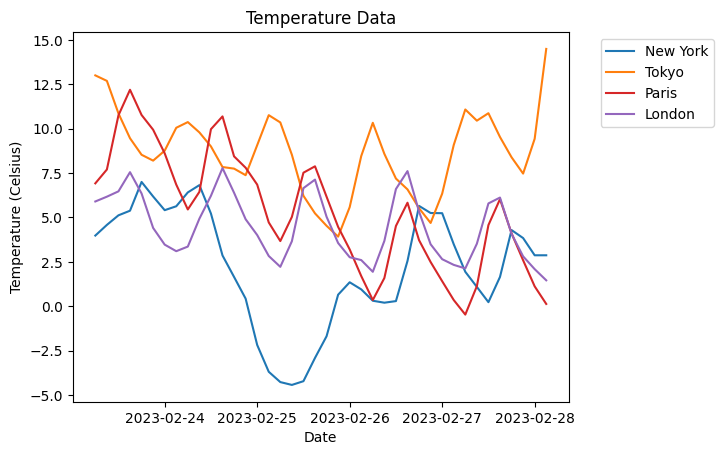

In [392]:
import matplotlib.pyplot as plt

# Plot temperature data for each city
fig, ax = plt.subplots()
cities = list(set(dframe['city']))
for city in cities:
    city_data = dframe[dframe['city'] == city]
    # print(city_data)
    ax.plot(city_data['date'], city_data['temperature'], label=city)
    
# Customize plot
ax.set_title('Temperature Data')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (Celsius)')
ax.legend(bbox_to_anchor=(1.05, 1))
plt.savefig('temperature_data.png', bbox_inches='tight')

# Show plot
plt.show()


In [389]:
import requests
import json
import datetime
import time
import pandas as pd
response = requests.get("https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd")
ids = ['bitcoin', 'ethereum']
crypto=[]
for id in ids:
        response = requests.get(f"https://api.coingecko.com/api/v3/coins/{id}/market_chart/range?vs_currency=usd&from=1676419200&to=1676505600")
        # print(response.json()['prices'])
        for i in response.json()['prices']:
            # print(i[1])
            price = i[1]
            date = datetime.datetime.fromtimestamp(i[0]/1000).strftime('%Y-%m-%d %H:%M:%S')
            crypto.append({"Coin": id, "Date": date, "Price": price})
    
df = pd.DataFrame(crypto)
df

,Coin,Date,Price
0,bitcoin,2023-02-15 05:31:55,22220.070997
1,bitcoin,2023-02-15 06:30:26,22154.797996
2,bitcoin,2023-02-15 07:31:15,22126.061731
3,bitcoin,2023-02-15 08:31:14,22096.144734
4,bitcoin,2023-02-15 09:32:04,22105.473439
5,bitcoin,2023-02-15 10:32:10,22102.407366
6,bitcoin,2023-02-15 11:31:49,22125.805466
7,bitcoin,2023-02-15 12:31:26,22123.790184
8,bitcoin,2023-02-15 13:32:07,22113.227132
9,bitcoin,2023-02-15 14:31:38,22115.100105
